# K-Nearest Neighbors
***
## Contents
- Introduction
- Algorithm
- Pros and Cons
- Code and Application
    - Classification
    - Regression
- Parameter Tuning and Inference

## Introduction
 The [k-nearest neighbors algorithm (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951. The main idea of this model is to average the k closest data to represent the prediction.

 ## Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
    1. Calculate the distance between the query example and the current example from the data.
    2. Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

The Euclidean distance is usually used in calculation distance, defined as $d(x_i, x_j) = \sqrt{\sum_{k=1}^{p}(x_{ik}-x_{jk})^2}$, where $x_i,x_j$ are two $1*p$ vectors, representing two data points.

## Algorithm illustration
How KNN Works

![avatar](images/k-nearest-neighbor-algorithm-for-machine-learning.png)

![avatar](images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

- Suppose we have a new data point and we need to put it in the required category. Consider the below image:

![avatar](images/k-nearest-neighbor-algorithm-for-machine-learning3.png)

- Firstly, we will choose the number of neighbors, so we will choose the k=5.
- Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:

![avatar](images/k-nearest-neighbor-algorithm-for-machine-learning4.png)

- By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

![avatar](images/k-nearest-neighbor-algorithm-for-machine-learning5.png)

## Pros and Cons
### Pros
- No Training Period: KNN modeling does not include training period as the data itself is a model which will be the reference for future prediction and because of this it is very time efficient in term of improvising for a random modeling on the available data.
- Easy Implementation: KNN is very easy to implement as the only thing to be calculated is the distance between different points on the basis of data of different features and this distance can easily be calculated using distance formula such as Euclidian or Manhattan
- As there is no training period thus new data can be added at any time since it wont affect the model.

### Cons
- Does not work well with large dataset as calculating distances between each data instance would be very costly.
- Does not work well with high dimensionality as this will complicate the distance calculating process to calculate distance for each dimension.
- Sensitive to noisy and missing data
- Feature Scaling- Data in all the dimension should be scaled (normalized and standardized) properly.

## Code and Application


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
import warnings

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


In [46]:
warnings.filterwarnings('ignore')
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

With our distance function, we are now ready to write a function to compute the $k$-nearest neighbors to a given point. This is done in the code cell below. 

In [3]:

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning. This is shown in the code cell below. 


In [4]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Next we write a function to compute the classification error

In [5]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [53]:
def regression_mse(test_features,
                    test_labels,
                    training_features, 
                    training_labels,
                    k):
    error = 0
    for point, y_test in zip(test_features, test_labels):
        error += (y_test - KNN_Predict(point,
                                        training_features,
                                        training_labels,
                                        k,
                                        regression=True))**2
    return error/len(test_features)

### Classification Problem: Wine Dataset
Load the wine dataset, and have a overview of the data

In [25]:
X, y = datasets.load_wine(return_X_y=True,as_frame=True)
print(X.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

There are three types of wine, and their number is 71, 59 and 48

In [17]:
print(y.value_counts())

1    71
0    59
2    48
Name: target, dtype: int64


Then, we visualize the first and second features to see if there are some clear clusters among dataset.

No handles with labels found to put in legend.


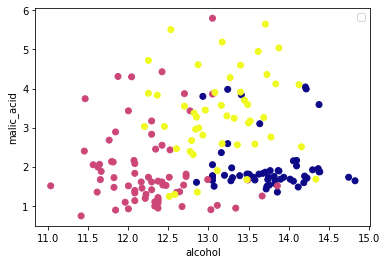

In [21]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1],c=y,cmap="plasma")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

In [ ]:
X, y = X.to_numpy(), y.to_numpy()

We can see clusters, but boundaries are not clear. Let's use KNN to predict new labels.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"The KNN prediction accuracy = {1-classification_error(X_test, y_test, X_train, y_train, 5)}")

The KNN prediction accuracy = 0.8333333333333334


The prediction accuracy is 83.3%, which is a relatively good model considering its simpilicity.

Since different features have different range, thus, some features which tend to have large numbers will have much more influence on distance compared to other features. Let's scale the data to relieve such impacts.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print(f"The KNN with scaled data prediction accuracy = {1-classification_error(X_test, y_test, X_train, y_train, 5)}")


The KNN prediction accuracy = 0.9722222222222222


The accuracy increase significantly to 97.2%, showing how essential scaling is when applying KNN.

### Regression Problem: Boston Dataset.

In [47]:
bos = datasets.load_boston()
X, y = bos.data, bos.target
pd.DataFrame(X).describe()

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=0)
print(f"The KNN with scaled Boston Housing Data, the prediction MSE = {regression_mse(X_test, y_test, X_train, y_train, 5)}")

The KNN with scaled Boston Housing Data, the prediction MSE = 35.69213725490197


The KNN regresssion is not a good model, MSE is very high.

## Parameter Tuning and Inference
We Train $KNN$ models with different $K$ from 1 to number of training sample, and plot accuracy with respect to $K$.

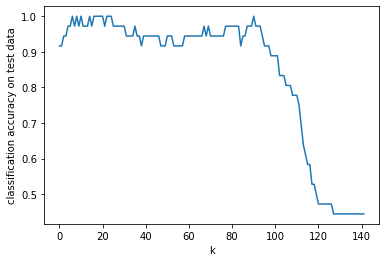

In [58]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
n_train = X_train.shape[0]

accuracy_list = []
for k in range(1,n_train+1):
    temp_acc = 1-classification_error(X_test, y_test, X_train, y_train, k)
    accuracy_list.append(temp_acc)

plt.plot(accuracy_list)
plt.xlabel('k')
plt.ylabel('classification accuracy')
plt.show()

From the above figure, the accuracy decrease significantly when K exceeds 90, and accuracy is higher when K is aruond 20.